# 1차시

In [1]:
import pandas as pd

In [29]:
week1 = pd.read_csv("data/sales(1).csv")
week2 = pd.read_csv("data/sales(2).csv")
customers = pd.read_csv("data/customer.csv")
foods = pd.read_csv("data/food.csv")
satisfaction = pd.read_csv("data/satisfaction.csv")

In [5]:
week1

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
245,413,9
246,926,6
247,134,3
248,396,6


In [6]:
week2

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3
...,...,...
245,783,10
246,556,10
247,547,9
248,252,9


In [7]:
customers

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive
3,4,Steven,Evans,Male,Fatz,Registered Nurse
4,5,Judy,Morrison,Female,Demivee,Legal Assistant
...,...,...,...,...,...,...
995,996,Debra,Garcia,Female,Dazzlesphere,Structural Engineer
996,997,Douglas,Bishop,Male,Livepath,Developer I
997,998,Frank,Franklin,Male,Brainverse,Nurse Practicioner
998,999,Jessica,Burns,Female,Babbleblab,Financial Advisor


In [8]:
foods

,First Name,Gender,City,Frequency,Item,Spend
0,Wanda,Female,Stamford,Weekly,Burger,15.66
1,Eric,Male,Stamford,Daily,Chalupa,10.56
2,Charles,Male,New York,Never,Sushi,42.14
3,Anna,Female,Philadelphia,Once,Ice Cream,11.01
4,Deborah,Female,Philadelphia,Daily,Chalupa,23.49
...,...,...,...,...,...,...
995,Donna,Female,New York,Monthly,Sushi,83.53
996,Albert,Male,Philadelphia,Daily,Sushi,72.88
997,Jean,Female,Stamford,Weekly,Donut,5.85
998,Jessica,Female,New York,Daily,Chalupa,43.19


In [9]:
satisfaction

,Satisfaction Rating
0,2
1,7
2,3
3,7
4,10
...,...
245,1
246,2
247,8
248,10


In [11]:
pd.concat(objs = [week1,week2]).loc[0]
# concat() : 데이터프레임을 상,하로 결합 (인덱스는 그대로 연결)

,Customer ID,Food ID
0,537,9
0,688,10


In [13]:
pd.concat(objs = [week1,week2], axis=1)
# concat(axis=1) : 데이터프레임을 좌, 우로 결합 (인덱스 순서대로 결합)

,Customer ID,Food ID,Customer ID,Food ID
0,537,9,688,10
1,97,4,813,7
2,658,1,495,10
3,202,2,189,5
4,155,9,267,3
...,...,...,...,...
245,413,9,783,10
246,926,6,556,10
247,134,3,547,9
248,396,6,252,9


In [14]:
week3 = week2.sort_index(ascending=False)
week3

,Customer ID,Food ID
249,249,6
248,252,9
247,547,9
246,556,10
245,783,10
...,...,...
4,267,3
3,189,5
2,495,10
1,813,7


In [16]:
pd.concat(objs = [week1,week3], axis=1)
#인덱스와 일치하는데로 연결

,Customer ID,Food ID,Customer ID,Food ID
0,537,9,688,10
1,97,4,813,7
2,658,1,495,10
3,202,2,189,5
4,155,9,267,3
...,...,...,...,...
245,413,9,783,10
246,926,6,556,10
247,134,3,547,9
248,396,6,252,9


In [18]:
sales = pd.concat(objs = [week1,week2], keys=['Week1','Week2'])
#keys=파라미터 : 각 데이터 프레임의 명칭 지정 (멀티 인덱스로 활용)
sales

Customer ID  Food ID
Week1 0            537        9
      1             97        4
      2            658        1
      3            202        2
      4            155        9
...                ...      ...
Week2 245          783       10
      246          556       10
      247          547        9
      248          252        9
      249          249        6

[500 rows x 2 columns]

In [20]:
week1.merge(week2,on = 'Customer ID',how='inner')

,Customer ID,Food ID_x,Food ID_y
0,537,9,5
1,155,9,3
2,155,1,3
3,503,5,8
4,503,5,9
...,...,...,...
57,945,5,4
58,343,3,5
59,343,3,2
60,343,3,7


In [21]:
week1.merge(week2,on = 'Customer ID',how='inner', suffixes=['- Week1','- Week2'])
# suffixes=파라미터 : 뒤에 자동으로 붙여질 멘트 지정 가능

,Customer ID,Food ID- Week1,Food ID- Week2
0,537,9,5
1,155,9,3
2,155,1,3
3,503,5,8
4,503,5,9
...,...,...,...
57,945,5,4
58,343,3,5
59,343,3,2
60,343,3,7


In [22]:
week1.merge(week2, on =['Customer ID','Food ID'],how='inner')
# Customer ID와 Food ID가 교집합을 이루는 데이터만 결합

,Customer ID,Food ID
0,304,3
1,540,3
2,937,10
3,233,3
4,21,4
5,21,4
6,922,1
7,578,5
8,578,5


In [24]:
week1.merge(week2,on = 'Customer ID',how='outer', suffixes=['- Week1','- Week2'])

,Customer ID,Food ID- Week1,Food ID- Week2
0,537,9.0,5.0
1,97,4.0,NaN
2,658,1.0,NaN
3,202,2.0,NaN
4,155,9.0,3.0
...,...,...,...
449,855,NaN,4.0
450,559,NaN,10.0
451,276,NaN,4.0
452,556,NaN,10.0


In [25]:
week1.merge(week2,on = 'Customer ID',how='outer', suffixes=['- Week1','- Week2'], indicator=True)
#indicator=True 파라미터 : 해당 데이터가 어느 데이터프레임에서 온 것인지 추가로 표시

,Customer ID,Food ID- Week1,Food ID- Week2,_merge
0,537,9.0,5.0,both
1,97,4.0,NaN,left_only
2,658,1.0,NaN,left_only
3,202,2.0,NaN,left_only
4,155,9.0,3.0,both
...,...,...,...,...
449,855,NaN,4.0,right_only
450,559,NaN,10.0,right_only
451,276,NaN,4.0,right_only
452,556,NaN,10.0,right_only


In [33]:
week1.merge(foods, on='Food ID', how='left')
# Food ID가 같은 행의 왼쪽에 나머지 데이터를 결합

,Customer ID,Food ID,Food Item,Price
0,537,9,Donut,0.99
1,97,4,Quesadilla,4.25
2,658,1,Sushi,3.99
3,202,2,Burrito,9.99
4,155,9,Donut,0.99
...,...,...,...,...
245,413,9,Donut,0.99
246,926,6,Pasta,13.99
247,134,3,Taco,2.99
248,396,6,Pasta,13.99


In [34]:
week1.merge(foods, on='Food ID', how='right')
#우측을 기준으로 결합

,Customer ID,Food ID,Food Item,Price
0,658,1,Sushi,3.99
1,600,1,Sushi,3.99
2,155,1,Sushi,3.99
3,341,1,Sushi,3.99
4,20,1,Sushi,3.99
...,...,...,...,...
245,809,10,Drink,1.75
246,584,10,Drink,1.75
247,274,10,Drink,1.75
248,151,10,Drink,1.75


In [35]:
foods

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99
3,4,Quesadilla,4.25
4,5,Pizza,2.49
5,6,Pasta,13.99
6,7,Steak,24.99
7,8,Salad,11.25
8,9,Donut,0.99
9,10,Drink,1.75


In [36]:
week1.merge(foods, how='left', on='Food ID', sort = True)
#Food ID 열을 기준으로 정렬

,Customer ID,Food ID,Food Item,Price
0,658,1,Sushi,3.99
1,600,1,Sushi,3.99
2,155,1,Sushi,3.99
3,341,1,Sushi,3.99
4,20,1,Sushi,3.99
...,...,...,...,...
245,809,10,Drink,1.75
246,584,10,Drink,1.75
247,274,10,Drink,1.75
248,151,10,Drink,1.75


In [38]:
week2.merge(customers,how='left', left_on ='Customer ID',right_on='ID')
# 결합하기 위해 공통적으로 가지고 있는 열이 없을 경우
# left_on, right_on 파라미터 : 결합하고자 하는 열을 각각 다르게 지정해준다.

,Customer ID,Food ID,ID,First Name,Last Name,Gender,Company,Occupation
0,688,10,688,Carl,Williamson,Male,Thoughtmix,Graphic Designer
1,813,7,813,Johnny,Walker,Male,Kayveo,Developer II
2,495,10,495,Deborah,Little,Female,Babbleblab,VP Accounting
3,189,5,189,Roger,Gordon,Male,Skilith,Operator
4,267,3,267,Matthew,Wood,Male,Agimba,Product Engineer
...,...,...,...,...,...,...,...,...
245,783,10,783,Phyllis,Meyer,Female,Voolia,Information Systems Manager
246,556,10,556,Samuel,Bailey,Male,Oyoloo,Nurse
247,547,9,547,Tina,Watkins,Female,Thoughtstorm,Accountant II
248,252,9,252,Douglas,Powell,Male,Jetwire,Geologist IV


In [39]:
week1.merge(customers, how='left', left_on='Customer ID',right_index=True)
# left_on, right_index : 좌측은 인덱스 이름을 기준으로, 오른쪽은 인덱스를 기준으로 결합

,Customer ID,Food ID,ID,First Name,Last Name,Gender,Company,Occupation
0,537,9,538.0,Sara,Washington,Female,Skimia,Database Administrator III
1,97,4,98.0,Jean,Mills,Female,Fivebridge,Product Engineer
2,658,1,659.0,Howard,Hudson,Male,Topicshots,Professor
3,202,2,203.0,Annie,Lane,Female,Skyble,Marketing Manager
4,155,9,156.0,Stephanie,Kelly,Female,Youopia,Automation Specialist III
...,...,...,...,...,...,...,...,...
245,413,9,414.0,Harold,Adams,Male,Dazzlesphere,Account Coordinator
246,926,6,927.0,Nicholas,Morris,Male,Linkbridge,Assistant Professor
247,134,3,135.0,Richard,Murphy,Male,Cogidoo,Software Consultant
248,396,6,397.0,Brenda,Ryan,Female,Oozz,Nurse Practicioner


In [41]:
customers.loc[202]

ID                          203
First Name                Annie
Last Name                  Lane
Gender                   Female
Company                  Skyble
Occupation    Marketing Manager
Name: 202, dtype: object

In [43]:
week1.join(satisfaction)

,Customer ID,Food ID,Satisfaction Rating
0,537,9,2
1,97,4,7
2,658,1,3
3,202,2,7
4,155,9,10
...,...,...,...
245,413,9,1
246,926,6,2
247,134,3,8
248,396,6,10


In [ ]:
week1.merge(satisfaction, how='left',left_index=True, right_index=True)

# 2차시

In [45]:
import numpy as np
import seaborn as sns

In [47]:
stock = pd.read_csv("data/stock.csv")
type(stock)

pandas.core.frame.DataFrame

In [48]:
stock = stock.squeeze()
# squeeze() : 차원 축소
stock

0        50.12
1        54.10
2        54.65
3        52.38
4        52.95
         ...  
3007    772.88
3008    771.07
3009    773.18
3010    771.61
3011    782.22
Name: Stock Price, Length: 3012, dtype: float64

<AxesSubplot:>

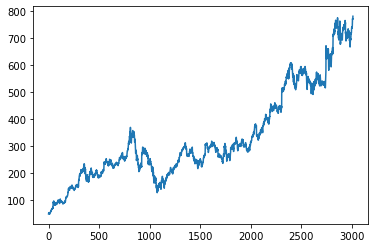

In [49]:
stock.plot()
# x: index, y: value

In [60]:
bond = pd.read_csv("data/007.csv",usecols=['Film','Budget'], index_col='Film').squeeze()
bond

Film
Dr. No                               7.0
From Russia with Love               12.6
Goldfinger                          18.6
Thunderball                         41.9
Casino Royale                       85.0
You Only Live Twice                 59.9
On Her Majesty's Secret Service     37.3
Diamonds Are Forever                34.7
Live and Let Die                    30.8
The Man with the Golden Gun         27.7
The Spy Who Loved Me                45.1
Moonraker                           91.5
For Your Eyes Only                  60.2
Never Say Never Again               86.0
Octopussy                           53.9
A View to a Kill                    54.5
The Living Daylights                68.8
Licence to Kill                     56.7
GoldenEye                           76.9
Tomorrow Never Dies                133.9
The World Is Not Enough            158.3
Die Another Day                    154.2
Casino Royale                      145.3
Quantum of Solace                  181.4
Skyfall    

<AxesSubplot:xlabel='Film'>

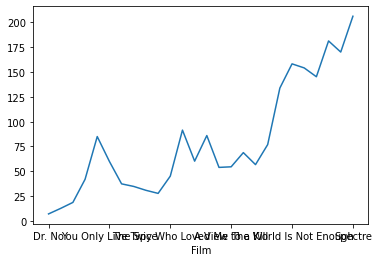

In [56]:
bond.plot()

<AxesSubplot:xlabel='Film'>

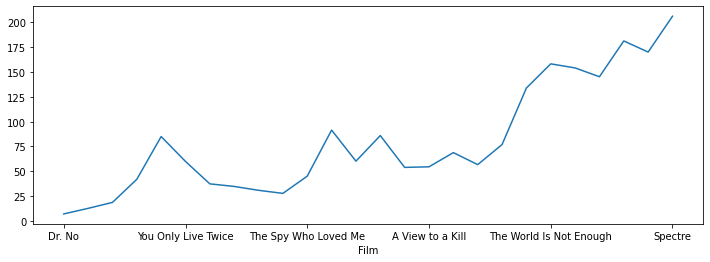

In [61]:
bond.plot(figsize = (12,4))
# figsize=파라미터: 그래프 사이즈 변경

In [64]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [66]:
iris = iris.drop(labels='species', axis=1)
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot:>

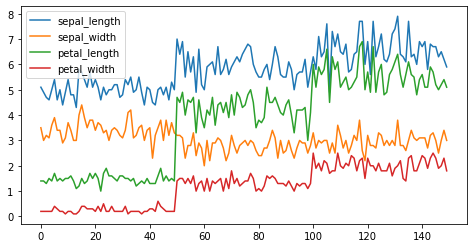

In [67]:
iris.plot(figsize=(8,4))

<AxesSubplot:>

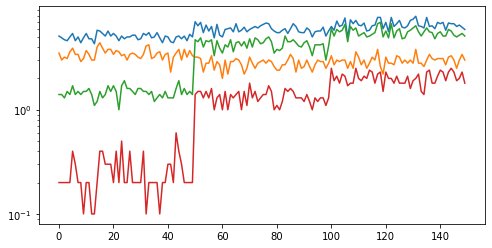

In [70]:
iris.plot(legend=False,figsize=(8,4), logy=True)
# legend = 파라미터 : 범례 설정

<AxesSubplot:>

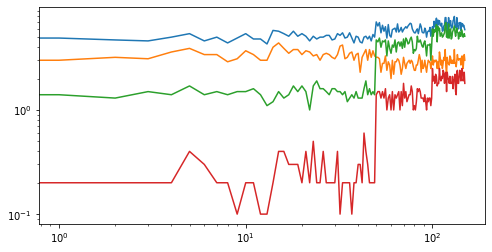

In [72]:
iris.plot(legend=False,figsize=(8,4), logy=True, logx=True)

In [74]:
iris1 = iris[['sepal_width','petal_width']]
iris2 = iris[['sepal_length','petal_length']]

In [75]:
iris1.head()

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


In [76]:
iris2.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


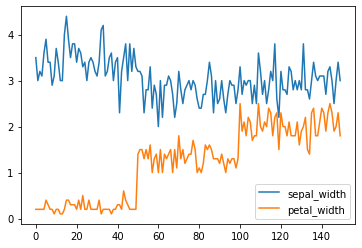

In [81]:
iris1.plot()

<AxesSubplot:>

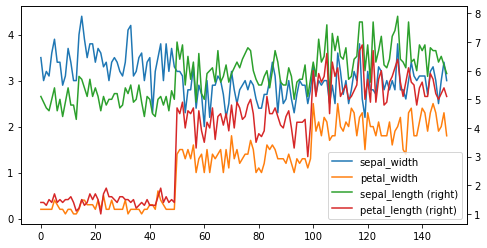

In [86]:
ax1 = iris1.plot()
iris2.plot(ax = ax1, figsize=(8,4), secondary_y=True)
#secondary_y 축 분리

In [88]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [90]:
bar_data = iris.iloc[0,:]
bar_data

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: 0, dtype: float64

<AxesSubplot:>

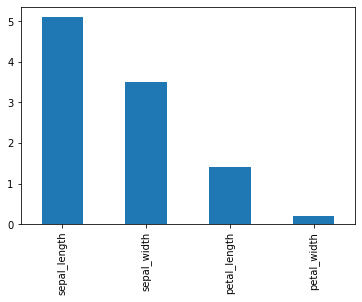

In [92]:
bar_data.plot(kind = 'bar')

<AxesSubplot:>

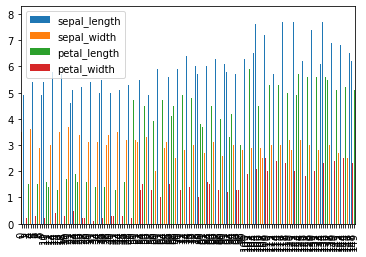

In [94]:
iris.plot(kind='bar')

<AxesSubplot:>

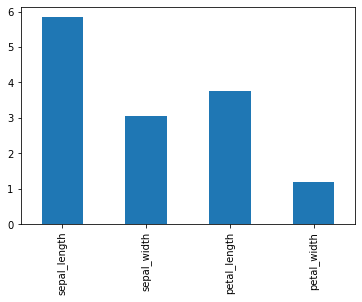

In [96]:
iris.mean().plot.bar()

In [100]:
df = pd.DataFrame(np.random.randn(10,4), columns=['a','b','c','d'])
df

,a,b,c,d
0,0.249365,1.997454,0.570005,1.044608
1,0.280409,0.130651,-0.200867,0.248289
2,0.295045,-0.152343,0.412145,-0.779361
3,-0.652785,2.325218,0.468999,0.211289
4,-0.983980,-0.597886,-0.193983,-0.740044
5,-0.766899,-0.285798,-0.542731,-0.275308
6,1.398089,0.464249,-0.288814,0.319219
7,-0.699064,-0.640524,-0.141108,1.142027
8,-0.140339,-0.479559,0.792907,-2.084968
9,1.434126,1.474605,-0.782567,-0.573814


<AxesSubplot:>

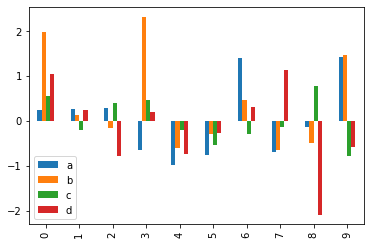

In [101]:
df.plot.bar()

<AxesSubplot:>

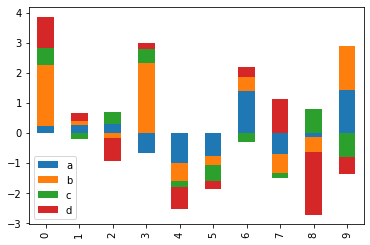

In [103]:
df.plot.bar(stacked=True)

<AxesSubplot:>

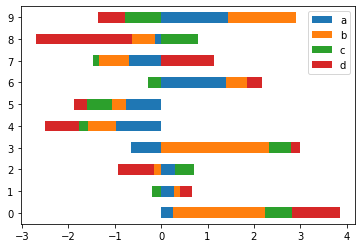

In [105]:
df.plot.barh(stacked=True)
# barh : horizeon type

<AxesSubplot:ylabel='Frequency'>

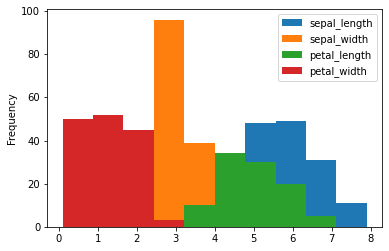

In [107]:
iris.plot.hist()
#특정 범위의 데이터의 value 반환

<AxesSubplot:ylabel='Frequency'>

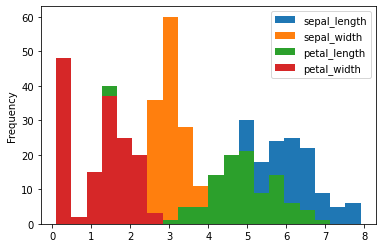

In [109]:
iris.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

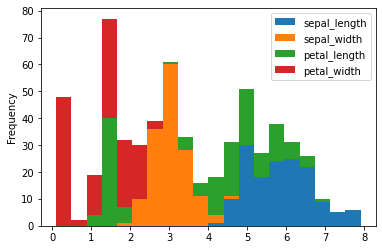

In [111]:
iris.plot.hist(bins=20, stacked=True)

<AxesSubplot:xlabel='Frequency'>

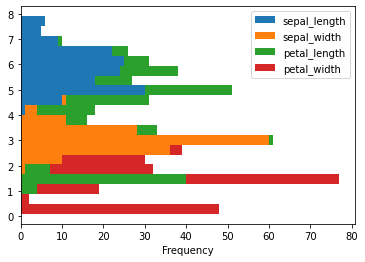

In [112]:
iris.plot.hist(bins=20, stacked=True, orientation = 'horizontal')

<AxesSubplot:ylabel='Frequency'>

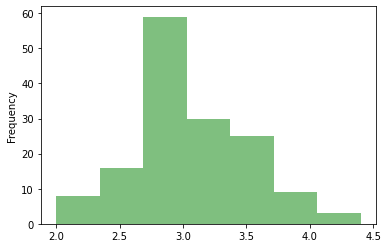

In [122]:
iris['sepal_width'].plot.hist(bins=7,color='green',alpha=0.5)

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

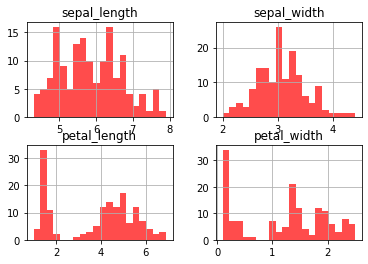

In [125]:
iris.hist(bins=20,color='red',alpha=0.7)

# 3차시

In [126]:
import seaborn as sns

In [129]:
iris = sns.load_dataset("iris")
iris = iris.drop("species",axis=1)
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot:>

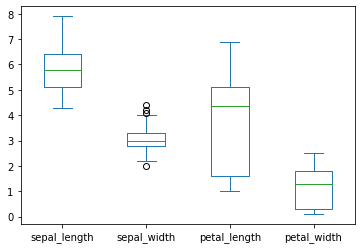

In [132]:
iris.plot.box()
# == iris.plot(kind='box')

In [133]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

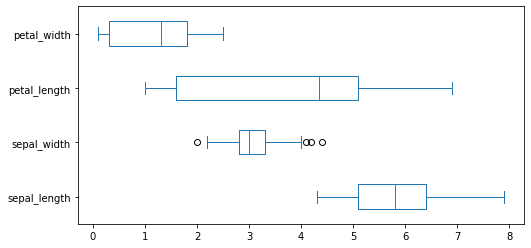

In [136]:
iris.plot.box(figsize=(8,4),vert=False)

In [137]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

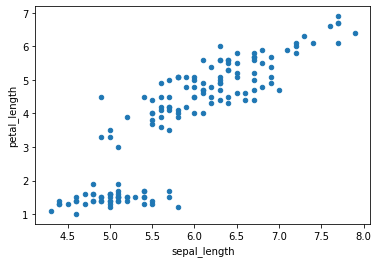

In [139]:
iris.plot.scatter(x='sepal_length',y='petal_length')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

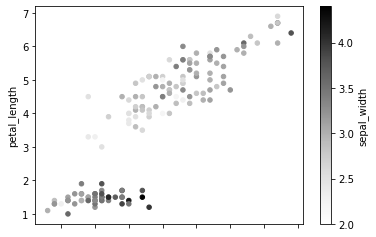

In [140]:
iris.plot.scatter(x='sepal_length',
                  y='petal_length',
                  c='sepal_width')

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

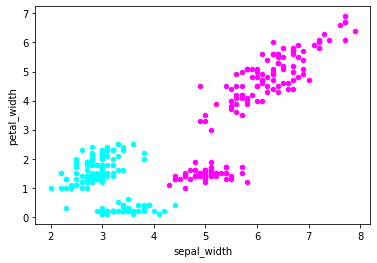

In [143]:
ax1 = iris.plot.scatter(x='sepal_length', y='petal_length', color='magenta')
iris.plot.scatter(x='sepal_width',y='petal_width',ax=ax1, color='cyan')
# 상관관계를 찾기 어렵다.

<AxesSubplot:>

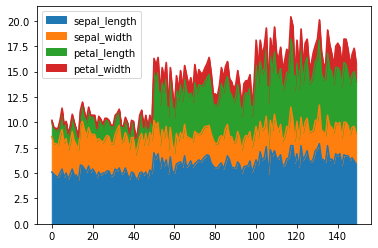

In [144]:
iris.plot.area()
# 파라미터가 없을 때, 모든 데이터의 누적값 반환

<AxesSubplot:>

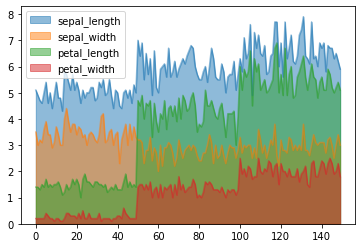

In [146]:
iris.plot.area(stacked=False)

In [147]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


<AxesSubplot:>

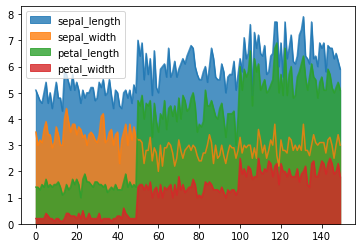

In [149]:
iris.plot.area(stacked=False, alpha=0.8)
# alpha : 투명도 조절

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

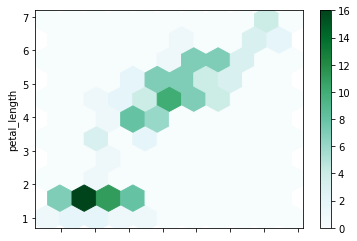

In [151]:
iris.plot.hexbin(x='sepal_length',y='petal_length',gridsize=10)
# 히스토그램을 2차원으로 표현한 형식.

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

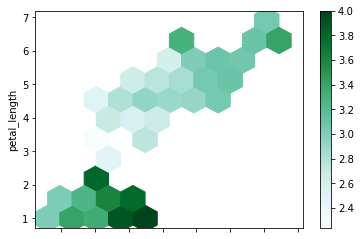

In [155]:
iris.plot.hexbin(x='sepal_length',y='petal_length',gridsize=10, C='sepal_width')
# 특정한 열의 특성을 한눈에 표시